In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [4]:
train_dir = Path("_data/2021-05-06")
train_dfs = list(train_dir.glob("*test.parquet"))
print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_parquet(train_df)
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)

[PosixPath('_data/2021-05-06/0-test.parquet'), PosixPath('_data/2021-05-06/1-test.parquet'), PosixPath('_data/2021-05-06/2-test.parquet'), PosixPath('_data/2021-05-06/3-test.parquet')]


In [6]:
print(out_df)

       epoch_time  initial_batch_size  max_batch_size  batch_growth_rate  \
0    1.620296e+09                  64            4096               0.01   
1    1.620296e+09                  64            4096               0.01   
2    1.620296e+09                  64            4096               0.01   
3    1.620296e+09                  64            4096               0.01   
4    1.620297e+09                  64            4096               0.01   
..            ...                 ...             ...                ...   
196  1.620322e+09                  64              64               0.01   
197  1.620322e+09                  64              64               0.01   
198  1.620322e+09                  64              64               0.01   
199  1.620322e+09                  64              64               0.01   
200  1.620322e+09                  64              64               0.01   

     dampingfactor  dampingdelay      epochs  verbose        lr  no_cuda  ...  \
0     

In [7]:
out_df = out_df.iloc[1:]

In [8]:
out_df.dtypes

epoch_time                             float64
initial_batch_size                       int64
max_batch_size                           int64
batch_growth_rate                      float64
dampingfactor                          float64
dampingdelay                             int64
epochs                                 float64
verbose                                   bool
lr                                     float64
no_cuda                                   bool
random_state                             int64
init_seed                                int64
damper                                  object
dataset                                 object
approx_loss                               bool
test_freq                                int64
rho                                    float64
dwell                                    int64
approx_rate                               bool
nesterov                                 int64
momentum                               float64
weight_decay 

In [9]:
out_df.describe()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,lr,random_state,init_seed,...,damping_time,_step_time,time,step_time,damping,lr_,batch_size,opt_param_lr_decay,opt_param_eps,opt_param_initial_accumulator_value
count,7.990000e+02,799.000000,799.000000,7.990000e+02,799.0,799.000000,799.000000,799.000000,799.0,799.0,...,796.000000,796.000000,7.960000e+02,796.000000,7.960000e+02,7.960000e+02,796.000000,201.0,2.010000e+02,201.0
mean,1.620309e+09,112.300375,16130.843554,1.000000e-02,5.0,5.503129,100.312020,0.014431,1000.0,1000.0,...,0.000102,2.122921,1.620309e+09,2.123058,8.424023e+22,1.016875e-02,1105.045226,0.0,1.000000e-10,0.0
std,7.487204e+03,83.363322,25502.147288,1.735810e-18,0.0,0.500303,58.093933,0.005104,0.0,0.0,...,0.000332,3.276973,7.459325e+03,3.277004,6.684006e+23,7.530501e-03,1712.354102,0.0,0.000000e+00,0.0
min,1.620296e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,0.000000,0.005633,1000.0,1000.0,...,0.000002,0.115750,1.620296e+09,0.115832,6.400000e+01,8.212619e-09,64.000000,0.0,1.000000e-10,0.0
25%,1.620302e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,50.080000,0.005633,1000.0,1000.0,...,0.000019,0.127262,1.620302e+09,0.127428,2.560000e+02,5.632876e-03,64.000000,0.0,1.000000e-10,0.0
50%,1.620309e+09,64.000000,64.000000,1.000000e-02,5.0,6.000000,100.266667,0.017389,1000.0,1000.0,...,0.000028,0.170903,1.620309e+09,0.171011,7.994948e+09,1.738879e-02,64.000000,0.0,1.000000e-10,0.0
75%,1.620315e+09,256.000000,60000.000000,1.000000e-02,5.0,6.000000,150.476550,0.017389,1000.0,1000.0,...,0.000038,0.572871,1.620315e+09,0.572960,9.765625e+12,1.738879e-02,256.000000,0.0,1.000000e-10,0.0
max,1.620322e+09,256.000000,60000.000000,1.000000e-02,5.0,6.000000,200.729100,0.017389,1000.0,1000.0,...,0.003013,8.313972,1.620322e+09,8.314193,7.450581e+24,1.738879e-02,4096.000000,0.0,1.000000e-10,0.0


<AxesSubplot:xlabel='epochs'>

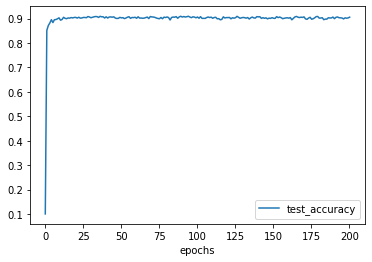

In [32]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

<ipython-input-48-d450c67bad3d>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


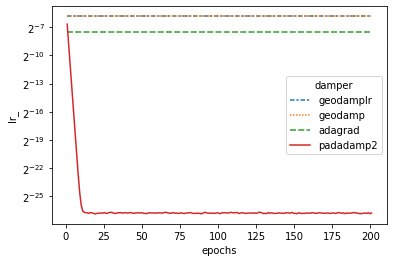

In [48]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper", hue_order=["geodamplr", "geodamp", "adagrad", "padadamp2"])
ax.set_yscale("log", basey=2)

<ipython-input-49-735a43321581>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


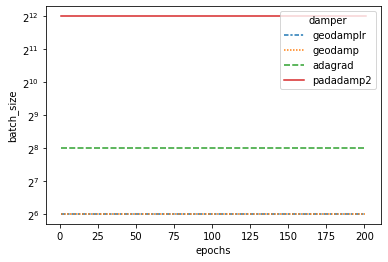

In [49]:
ax = sns.lineplot(x="epochs", y="batch_size", hue="damper", data=df, ci=None, style="damper", hue_order=["geodamplr", "geodamp", "adagrad", "padadamp2"])
ax.set_yscale("log", basey=2)

<ipython-input-50-4dc2c771222f>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


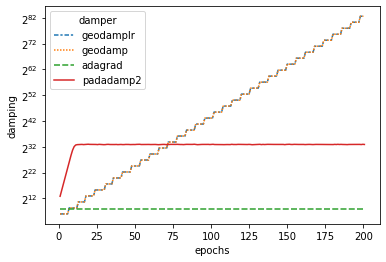

In [50]:
ax = sns.lineplot(x="epochs", y="damping", hue="damper", data=df, ci=None, style="damper", hue_order=["geodamplr", "geodamp", "adagrad", "padadamp2"])
ax.set_yscale("log", basey=2)

In [5]:
out_df.damper.unique()

array(['padadamp2', 'adagrad', 'geodamp', 'geodamplr'], dtype=object)

<ipython-input-54-ebee4823b5f8>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 25.0)

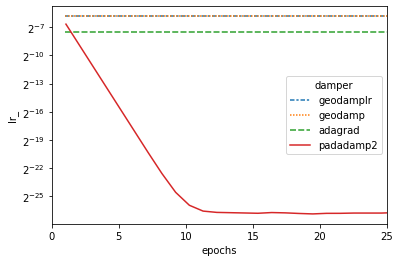

In [54]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper", hue_order=["geodamplr", "geodamp", "adagrad", "padadamp2"])
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 25)

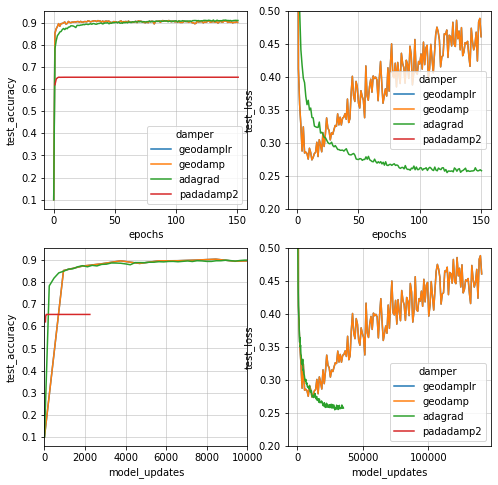

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))
df = out_df

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="damper",
            hue_order=["geodamplr", "geodamp", "adagrad", "padadamp2"],
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
        if "acc" in y and "updates" in x:
            ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "acc" in y and "model" in x:
            ax.legend_.remove()